<center><strong>Sistem Temu Kembali Informasi</strong><br />
<strong><font color="blue">Semester Gasal T.A. 2020/2021</font></strong><br />
</center>

<strong>Outline pertemuan minggu ke-5</strong><br />
<li> Pendahuluan Klasifikasi </li>
<li> K-NN, Naive Byaes, Decision Tree, SVM, NN </li>
<li> Visualisasi dengan boxplot </li>


<p><img alt="" src="figures/56_Supervised VS unsupervised.png" style="height:500px; width:1153px" /></p>

### K-Nearest Neighbour (K-NN) 
- Classifier yang paling sederhana
- Dapat digunakan untuk permaslaahn klasifikasi dan regresi

<strong> Kelebihan: </strong>
- Efisien untuk data berukuran besar
- Sederhana, mudah diimplementasikan
- Mudah dimodikasi (perhitungan jarak)
- Menangani data multiclass dengan mudah

<strong> Kekurangan: </strong>
- Semakin besar data semakin lambat performanya (menghitung NN)
- Memerlukan jumlah K optimal
- Tidak cocok untuk imbalance data

<p><img alt="" src="figures/6_kNN.JPG" style="height:300px; width:711px" /></p>

In [1]:
# load data pickle dari 20newsgroups yang didapat dari pertemuan 4
import pickle
import os

src_name = "20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

print('DONE!')

DONE!


In [2]:
# preprocessing
import nltk
nltk.download('punkt')
import re
from nltk import sent_tokenize
from nltk import word_tokenize

def preprocess(doc):
    sents = sent_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) # menghapus repetitive space
        
        sents_tok.append(s)
    
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)

(1653, 10721)


In [4]:
print(len(label))
print(len(docs_clear))
print(len(X.getnnz(1)))
print(X.shape)

1653
1653
1653
(1653, 10721)


In [5]:
# Cleaning noise
# Hapus label yang memiliki row = 0 pada tfidf-nya
# Hapus row yang memiliki nilai 0
Y = label[X.getnnz(1)>0]
X_clear = X[X.getnnz(1)>0]

# Hapus dokumen yang memiliki nilai row 0
docs_nonzero = list()
for i, d in enumerate(X.getnnz(1)>0):
    if d:
        docs_nonzero.append(docs_clear[i])

print(X_clear.shape, len(Y), len(docs_nonzero))

(1590, 10721) 1590 1590


In [6]:
# Membagi data menjadi dua yaitu data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_clear, Y, test_size=.3, \
                                                    random_state=7)
print(X_train.shape, X_test.shape)

(1113, 10721) (477, 10721)


In [7]:
# KNN menggunakan scikit-learn library
# http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

K = 10
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors=K, weights=weights)
kNN.fit(X_train, Y_train)
print('Done!')

Done!


In [8]:
# Prediksi dengan KNN
Y_knn = kNN.predict(X_test)

In [9]:
# Evaluasi dengan akurasi
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_knn)

0.7023060796645703

<h3 id="Latihan:"><font color="blue">Latihan 1:</font></h3>

<ul> 
    <li> Mengapa perlu dilakukan data splitting (training dan testing)?</li>
    <li> Apakah rasio splitting berpengaruh pada performa dari model? </li>
    <li> Cobalah beberapa model dengan merubah nilai dari parameter K, berapakah nilai K yang paling optimal? </li>

### Jawaban Lat 1

- Mengapa perlu dilakukan data splitting (training dan testing)?
  
  Untuk membentuk model yang lebih baik daripada melatih data pada data yang sama, membuat model lebih general, mencegah overfit pada data yang sama dan meningkatkan pengukuran keakuratan data [link](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)

- Apakah rasio splitting berpengaruh pada performa dari model?

  Berpengaruh. Dengan data pelatihan yang lebih sedikit, estimasi parameter Anda memiliki varian yang lebih besar. Dengan lebih sedikit data pengujian, statistik kinerja Anda akan memiliki varian yang lebih besar. Secara umum, kita harus peduli dengan pembagian data sehingga tidak ada varians yang terlalu tinggi [link](https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio). Selain itu juga bergantung terhadap data itu sendiri. Tujuan pembagian rasio adalah pembagian itu dapa mengeneralkan tren dari dataset kita [link](https://towardsdatascience.com/data-splitting-technique-to-fit-any-machine-learning-model-c0d7f3f1c790)

In [10]:
# Cobalah beberapa model dengan merubah nilai dari parameter K, berapakah nilai
# K yang paling optimal?
acc = list()
for K in range(1,31):
  kNN = neighbors.KNeighborsClassifier(n_neighbors=K, weights=weights)
  kNN.fit(X_train, Y_train)
  Y_knn = kNN.predict(X_test)
  acc.append(accuracy_score(Y_test, Y_knn))

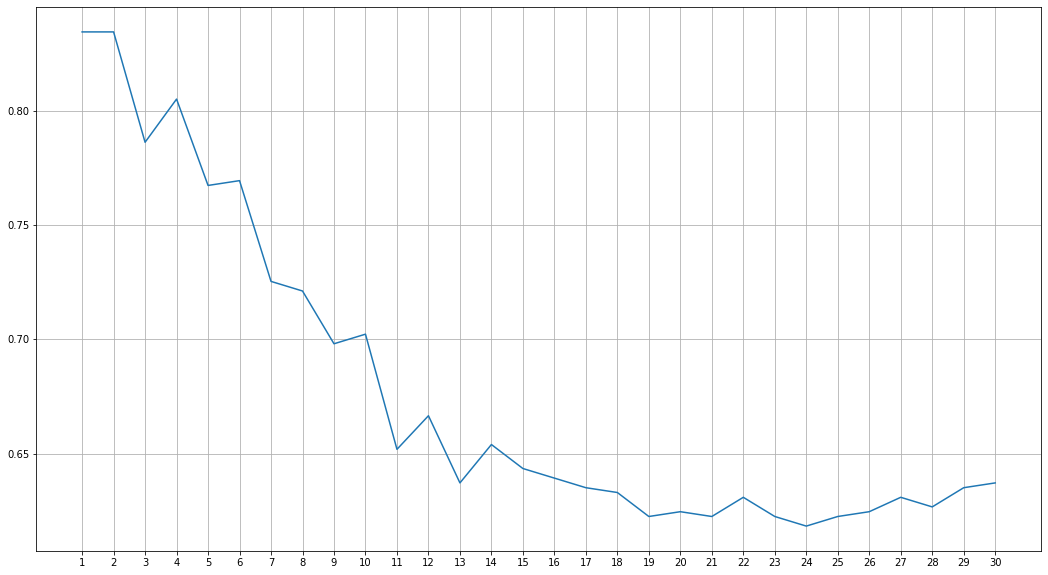

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,10))
plt.plot(np.arange(1, 31), acc)
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

- Cobalah beberapa model dengan merubah nilai dari parameter K, berapakah nilai K yang paling optimal?

  Dari percobaan range 1 hingga 30, yang optimal yakni 1 dan 2

### Naive Bayes Classifier

Metode klasifikasi dengan pendekatan probabilitas yang didasarkan pada teorema <strong>Bayes</strong>. Berasumsi bahwa semua fitur adalah independen dan memiliki kontribusi yang sama.

<p><img alt="" src="figures/naive_bayes.png" style="width: 400px ; height: 220px" /></p>

<strong>Dimana:</strong>
- x : fitur
- c : kelas
- P(c|x) : Probabilitas kelas c diberikan x sebagai fitur

<strong> Kelebihan:</strong>
- Cepat dan mudah diimplementasikan
- Cocok untuk multiclass
- Dapat bekerja dengan baik untuk data berdimensi tinggi (high-dimensional data)

<strong> Kekurangan:</strong>
- Asumsi bahwa semua fitur independen terkadang tidak sesuai dengan real-life data

In [12]:
# Menggunakan data sebelumnya
# Naive bayes menggunakan library scikit-learn
# http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train.toarray(), Y_train) 
Y_nbc = nbc.predict(X_test.toarray())

accuracy_score(Y_test, Y_nbc)

0.8658280922431866

### Decision Tree

Decision tree menggunakan rule-based (if else condition) pada sebuah tree untuk membangan sebuah model. Decision tree dapat dipergunakan untuk categorical ataupun numerical data. 

<p><img alt="" src="figures/6_DT.png" style="height:336px; width:904px" /></p>

<p> Contoh: </p>
<p><img alt="" src="figures/6_DT_meme.png" style="height:342px; width:460px" /></p>

<strong>Kelebihan:</strong>
- Mudah untuk dipahami, cocok untuk visualisasi
- Dapat digunakan untuk categorical maupun numerical data
- non-parametric model
- Robust terhadap outliers dan missing values

<strong>Kekurangan:</strong>
- Sering overfit





In [13]:
# Decision Tree dengan library scikit-learn
#http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)
Y_DT = DT.predict(X_test)

accuracy_score(Y_test, Y_DT)

0.6687631027253669

In [14]:
!pip install pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


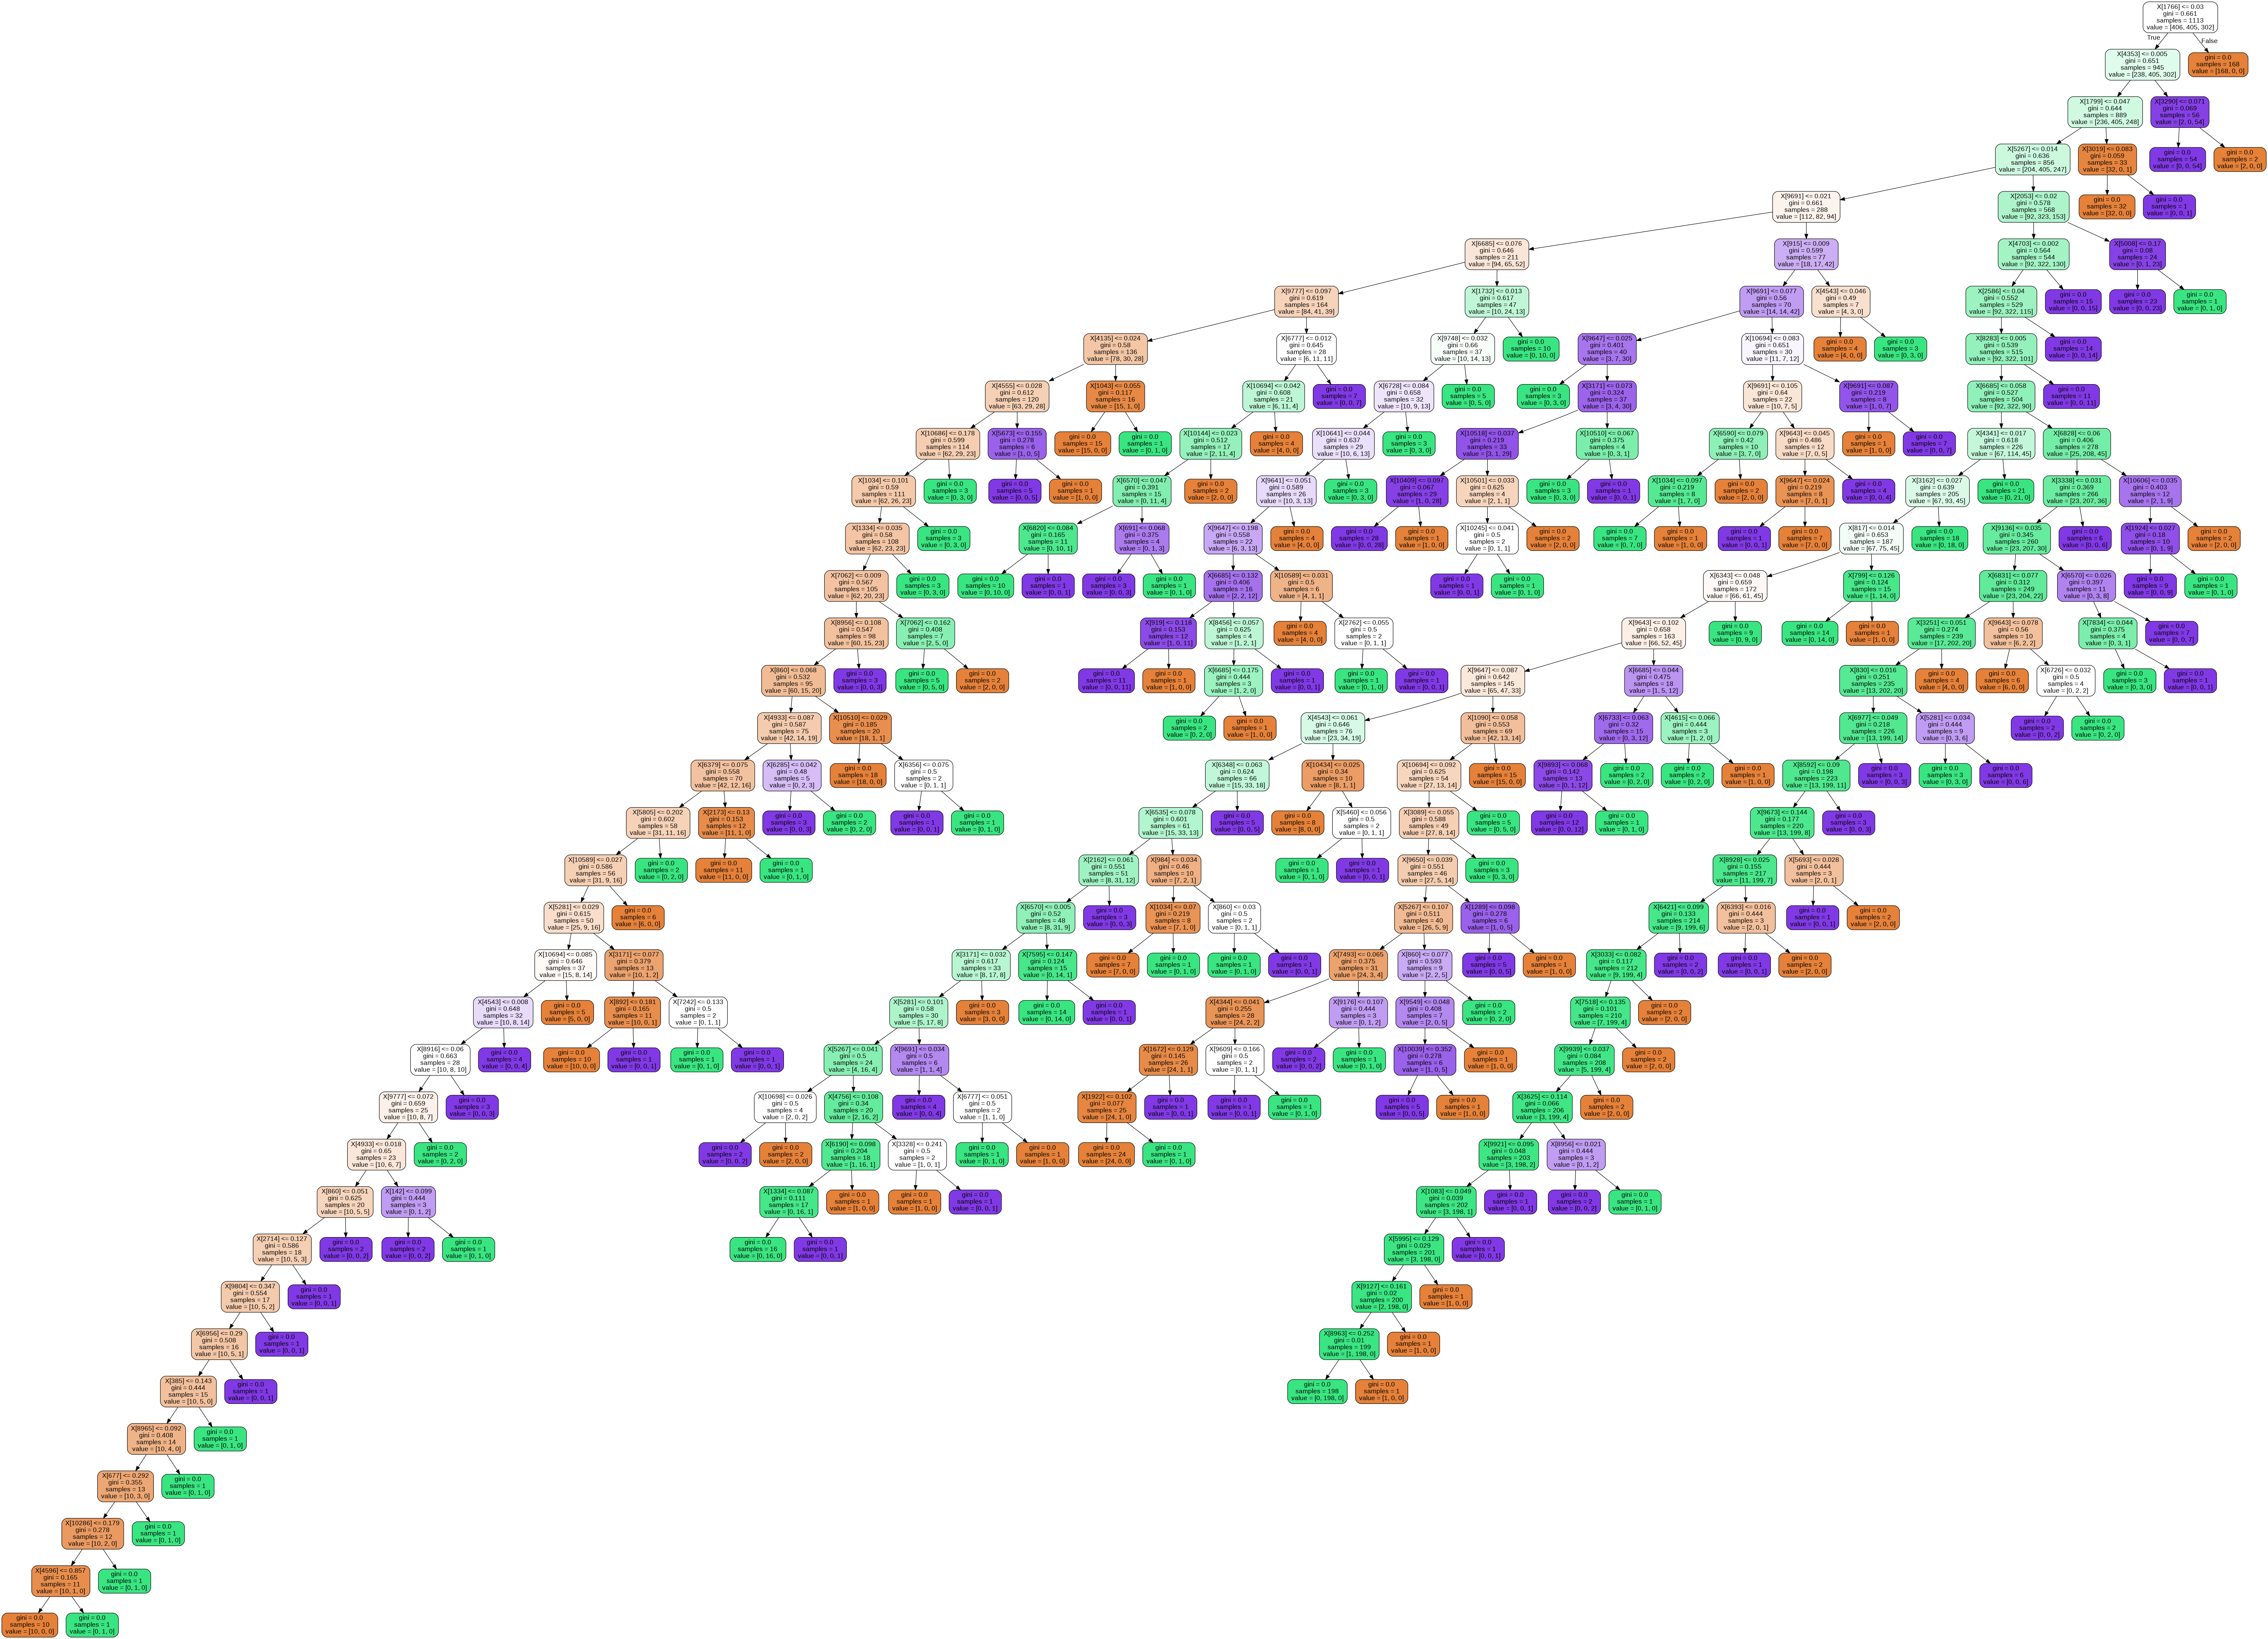

In [15]:
# Visualisasi tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

<p><img alt="" src="figures/5_RandomForest.png" style="width: 592px; height: 444px;" /></p>

<p>Terdiri dari beberapa decision tree. Merupakan ensamble algorithm yang mengambil hasil dari beberapa decision tree. </p>

<strong>Kelenihan:</strong>
- Robust terhadap outlier
- Dapat bekerja dengan baik pada non-linear data
- Dapat menurunkan risiko overfitting
- Dapat bekerja dengan efisien pada data set yang besar

<strong>Kekurangan:</strong>
- Bias ketika dipergunakan untuk categorical variabel
- lambat

In [16]:
# Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)
Y_RF = RandomForest.predict(X_test)
accuracy_score(Y_test, Y_RF)

0.7589098532494759

### Support Vector Machine (SVM)

<p><img alt="" src="figures/6_SVM.jpg" style="height: 262px ; width: 232px" /><img alt="" src="figures/svm_opt.png" style="width: 300px; height: 106px;" /></p>
<p>SVM melakukan plotting data ke dalam n-dimensi. Klasifikasi dilakukan dengan mencari hyper-plane yg memisahkan dua kelas.</p>

<h4> SVM kernel </h4>
<p> SVM kernel digunakan untuk data yang bersifat non-linear. Data yang bersifat non-linear tidak dapat dipisahkan dengan menggunakan garis lurus seperti pada data linear. Untuk mengatasi permasalahan tersebut digunakan <strong>kernel trick</strong>. Kernel trick mentransformasikan data ke dalam dimensi yg lebih tinggi agar lebih mudah dipisahkan.</p>

<strong> Beberapa kernel SVM:</strong>
- Linear
- Polynomial
- RBF
- Sigmoid


<h4>SVM multiclass</h4>

<p><img alt="" src="figures/6_SVM_Ova.jpg" style="height:314px; width:432px" /></p>

<strong>Kelebihan:</strong>
- Dapat bekerja dengan efektif pada dataset berukuran kecil
- Memiliki performa yang baik untuk data berdimensi tinggi
- Relatif efisien dalam penggunaan memori

<strong>Kekurangan:</strong>
- Kurang cocok untuk dataset berukuran besar
- Kurang efektif untuk data yang memiliki banyak noise

In [17]:
# SVM
# http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

dSVM = svm.SVC(decision_function_shape='ovo') # one versus one SVM
dSVM.fit(X_train, Y_train)
Y_SVM = dSVM.predict(X_test)
accuracy_score(Y_test, Y_SVM)

0.870020964360587

In [18]:
# Menggunakan kernel trick
# Default kernel dari fungsi SVM pada scikit learn adalah 'RBF'
list_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in list_kernel:
    dSVM = svm.SVC(kernel=kernel, gamma='auto')
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(kernel, ':', accuracy_score(Y_test, y_SVM))

linear : 0.8972746331236897
poly : 0.3270440251572327
rbf : 0.3270440251572327
sigmoid : 0.3270440251572327


### Cross Validation

<p>Cross validation dipergunakan untuk memvalidasi hasil dari suatu model, memastikan objektifitas dari hasil. </p>

<p><img alt="" src="figures/6_Cross_validation.png" style="height:274px; width:485px" /></p>

In [19]:
# Cross validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

svm_ = svm.SVC(kernel='linear')
start = time.time()
scores_svm = cross_val_score(svm_, X_clear, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
timepros = time.time() - start

print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, timepros))

Accuracy SVM: 0.91 (+/- 0.04), Waktu = 18.356 detik


In [20]:
# Bagaimana dengan k-NN ?
mulai = time.time()
scores_kNN = cross_val_score(kNN, X_clear, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy k-NN: 0.66 (+/- 0.07), Waktu = 0.219 detik


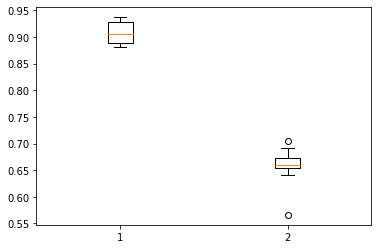

In [21]:
# Visualisasi hasil dengan boxplot
# Buat BoxPlotnya
import matplotlib.pyplot as plt
import numpy as np

Data = [scores_svm, scores_kNN]
L = ['SVM', 'kNN']

fig, ax = plt.subplots()
  
# Creating plot 
plt.boxplot(Data) 
  
# show plot 
plt.show() 

### Bagaimana jika ingin menggunakan word embedding sebagai representasi vektornya?

In [22]:
# Melakukan persiapan dokumen
# yang digunakan sebagai data adalah docs_nonzero
doc_gensim = [word_tokenize(d) for d in docs_nonzero]

In [23]:
# membuat Word Embeddingnya
from gensim.models import FastText

N = len(doc_gensim)
dim = 300 # Jumlah neurons = ukuran vektor = jumlah kolom
model_FT = FastText(doc_gensim, size=dim, window=5, min_count=1, workers=-1)

In [24]:
# NOTE: 
# tidak dapat langsung menggunakan hasil dari word embedding
# representasi vektor embedding adalah representasi per kata
# harus mengkonversikan dari word embedding ke dalam vektor space
# dokumen x words
def we2vsm(model_we, data_we):
    N = len(data_we)
    L = model_we.vector_size
    vsm_we = np.empty([N, L], dtype=np.float64) # inisialisasi matriks
    for i,d in enumerate(data_we):
        tmp = np.zeros([1, L], dtype=np.float64)
        count = 0
        for t in d:
            try:
                tmp += model_we.wv.__getitem__([t])
                count += 1
            except:
                pass
        if count>0:
            vsm_we[i] = tmp/count
    return vsm_we

In [25]:
vsm_we = we2vsm(model_FT, doc_gensim)
vsm_we.shape

(1590, 300)

#### Setelah memiliki bentuk representasi dokumen, langkah selanjutnya adalah melakukan proses klasifikasi seperti yang telah dicontohkan sebelumnya

<h3 id="Latihan:"><font color="blue">Latihan 2:</font></h3>

- Lakukan klasifikasi dengan representasi yang telah diperoleh dari proses word embedding (vsm_we) dengan berbagai metode (knn, desicion tree, random forest, naive bayes, dan VSM)
- Visualisasikan hasilnya
- Bandingkan hasilnya dengan representasi dari VSM-TFIDF

### Lakukan klasifikasi dengan representasi yang telah diperoleh dari proses word embedding (vsm_we) dengan berbagai metode (knn, desicion tree, random forest, naive bayes, dan VSM)

#### KNN

In [26]:
K = 1
kNN = neighbors.KNeighborsClassifier(n_neighbors=K, weights=weights)
scores_kNN = cross_val_score(kNN, vsm_we, Y, cv=10)
print("Accuracy k-NN: %0.2f (+/- %0.2f)" % (scores_kNN.mean(), \
                                            scores_kNN.std() * 2))

Accuracy k-NN: 0.52 (+/- 0.07)


#### Decision Tree

In [27]:
DT = tree.DecisionTreeClassifier()
scores_DT = cross_val_score(DT, vsm_we, Y, cv=10)
print("Accuracy DT: %0.2f (+/- %0.2f)" % (scores_DT.mean(), \
                                            scores_DT.std() * 2))

Accuracy DT: 0.44 (+/- 0.05)


#### Random Forest

In [28]:
RandomForest = RandomForestClassifier()
scores_RF = cross_val_score(RandomForest, vsm_we, Y, cv=10)
print("Accuracy RF: %0.2f (+/- %0.2f)" % (scores_RF.mean(), \
                                            scores_RF.std() * 2))

Accuracy RF: 0.59 (+/- 0.08)


#### Naive Bayes

In [30]:
gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, vsm_we, Y, cv=10)
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), \
                                            scores_gnb.std() * 2))

Accuracy GNB: 0.47 (+/- 0.07)


#### SVM (Mohon maaf typo saya rasa tak ada metode klasifikasi dengan VSM)

In [39]:
svm_ = svm.SVC(decision_function_shape='ovo') # one versus one SVM
scores_svm = cross_val_score(svm_, vsm_we, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), \
                                           scores_svm.std() * 2))

Accuracy SVM: 0.71 (+/- 0.07)


### Visualisasikan hasilnya

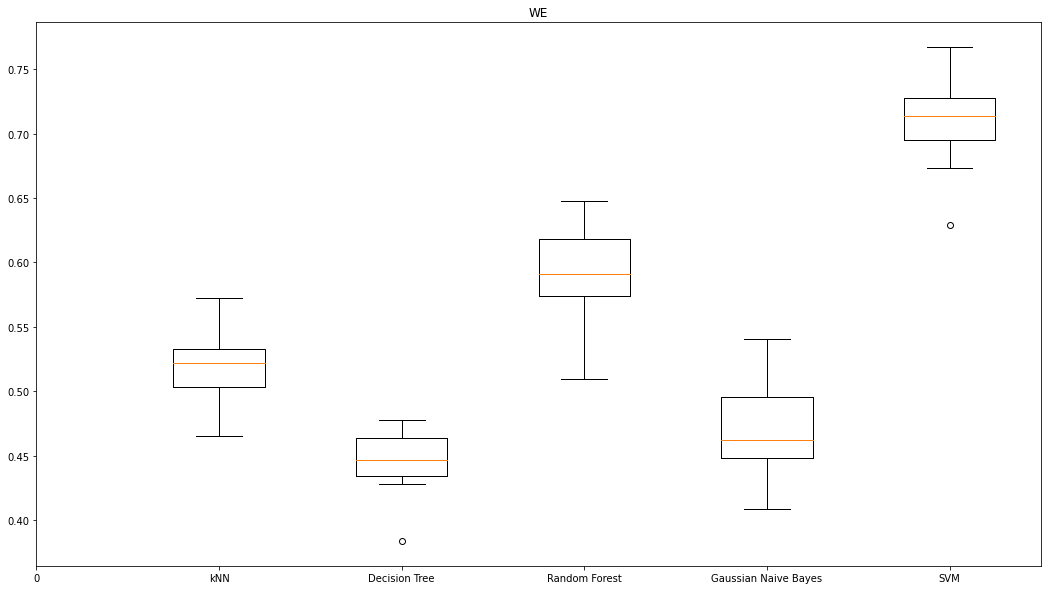

In [40]:
def plot_viz():
  Data = [scores_kNN, scores_DT, scores_RF, scores_gnb, scores_svm]
  L = [0, 'kNN', "Decision Tree", "Random Forest", "Gaussian Naive Bayes", 'SVM']
  plt.figure(figsize=(18,10))
  plt.boxplot(Data)
  plt.title("WE")
  plt.xticks(np.arange(len(L)), L)
  plt.show() 

plot_viz()

### Bandingkan hasilnya dengan representasi dari VSM-TFIDF

#### KNN

In [41]:
K = 1
kNN = neighbors.KNeighborsClassifier(n_neighbors=K, weights=weights)
vsm_scores_kNN = cross_val_score(kNN, X_clear, Y, cv=10)
print("Accuracy k-NN: %0.2f (+/- %0.2f)" % (vsm_scores_kNN.mean(), \
                                            vsm_scores_kNN.std() * 2))

Accuracy k-NN: 0.85 (+/- 0.04)


#### Decision Tree

In [42]:
DT = tree.DecisionTreeClassifier()
vsm_scores_DT = cross_val_score(DT, X_clear, Y, cv=10)
print("Accuracy DT: %0.2f (+/- %0.2f)" % (vsm_scores_DT.mean(), \
                                            vsm_scores_DT.std() * 2))

Accuracy DT: 0.64 (+/- 0.05)


#### Random Forest

In [43]:
RandomForest = RandomForestClassifier()
vsm_scores_RF = cross_val_score(RandomForest, X_clear, Y, cv=10)
print("Accuracy RF: %0.2f (+/- %0.2f)" % (vsm_scores_RF.mean(), \
                                            vsm_scores_RF.std() * 2))

Accuracy RF: 0.81 (+/- 0.07)


#### Naive Bayes

In [44]:
gnb = GaussianNB()
vsm_scores_gnb = cross_val_score(gnb, X_clear.toarray(), Y, cv=10)
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (vsm_scores_gnb.mean(), \
                                            vsm_scores_gnb.std() * 2))

Accuracy GNB: 0.89 (+/- 0.04)


#### SVM (Mohon maaf typo saya rasa tak ada metode klasifikasi dengan VSM)

In [47]:
svm_ = svm.SVC(decision_function_shape='ovo') # one versus one SVM
vsm_scores_svm = cross_val_score(svm_, X_clear, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (vsm_scores_svm.mean(), \
                                           vsm_scores_svm.std() * 2))

Accuracy SVM: 0.90 (+/- 0.05)


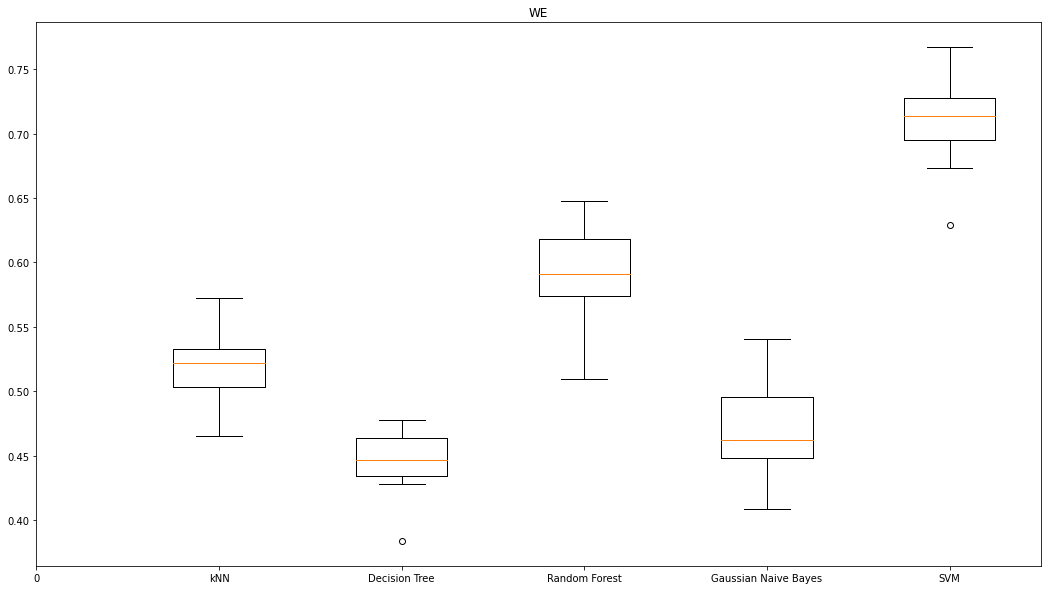

None

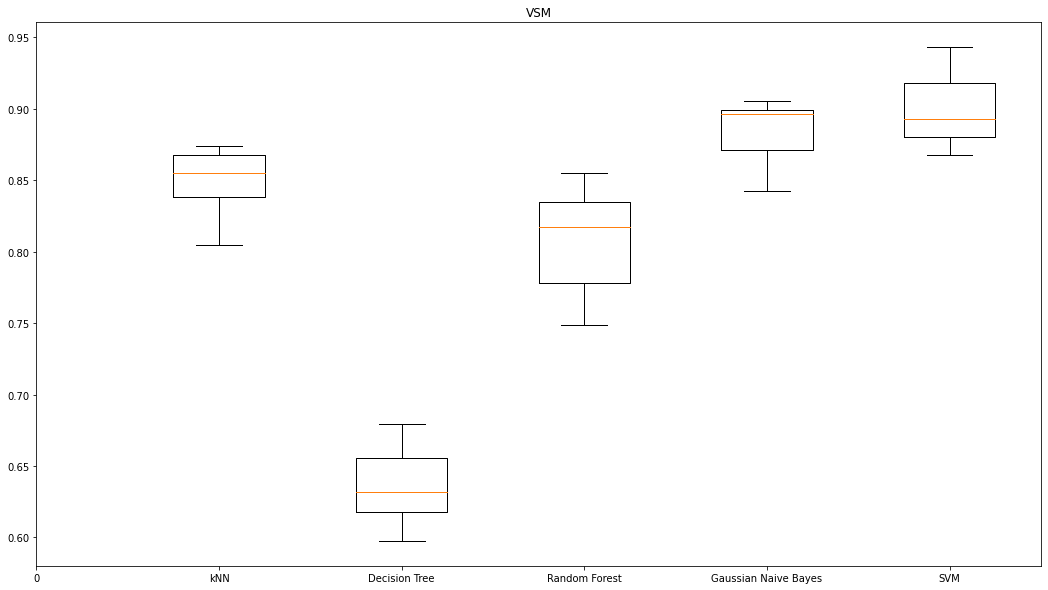

None

In [48]:
display(plot_viz())

vsm_Data = [vsm_scores_kNN, vsm_scores_DT, vsm_scores_RF, vsm_scores_gnb,\
        vsm_scores_svm]
L = [0, 'kNN', "Decision Tree", "Random Forest", "Gaussian Naive Bayes", 'SVM']
plt.figure(figsize=(18,10))
plt.boxplot(vsm_Data)
plt.title("VSM")
plt.xticks(np.arange(len(L)), L)
display(plt.show())